In [1]:
# imports

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns 

from pydataset import data
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

import wrangle_mall as wm

import warnings
warnings.filterwarnings('ignore')


#### 1. Clustering with the Iris Dataset

Using this lesson as a guide, perform clustering on the iris dataset.

- a. Choose features other than the ones used in the lesson.
- b.Visualize the results of your clustering.
- c. Use the elbow method to visually select a good value for k.
- d. Repeat the clustering, this time with 3 different features.

In [2]:
# load iris data
iris = data('iris')

# peak into data
iris.head()

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
1,5.1,3.5,1.4,0.2,setosa
2,4.9,3.0,1.4,0.2,setosa
3,4.7,3.2,1.3,0.2,setosa
4,4.6,3.1,1.5,0.2,setosa
5,5.0,3.6,1.4,0.2,setosa


In [3]:
# rename columns
iris = iris.rename(columns={'Sepal.Length': 'sepal_length', 'Sepal.Width': 'sepal_width','Petal.Length':'petal_length', 'Petal.Width':'petal_width', 'Species':'sepcies'})

In [4]:
# peak into data to see if columns names have changed
iris.head(3)

,sepal_length,sepal_width,petal_length,petal_width,sepcies
1,5.1,3.5,1.4,0.2,setosa
2,4.9,3.0,1.4,0.2,setosa
3,4.7,3.2,1.3,0.2,setosa


In [5]:
# set seed
seed = 42

# split data into train and val_test data
train, val_test = train_test_split(iris, test_size=0.2, random_state=seed)

# get rows and columns of train data
train.shape

(120, 5)

In [6]:
# peak into train data
train.head(3)

,sepal_length,sepal_width,petal_length,petal_width,sepcies
23,4.6,3.6,1.0,0.2,setosa
16,5.7,4.4,1.5,0.4,setosa
66,6.7,3.1,4.4,1.4,versicolor


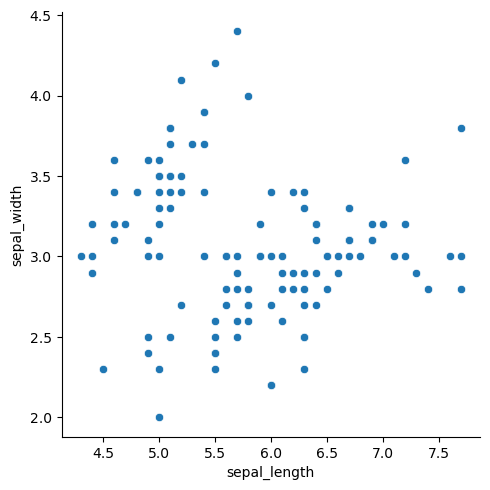

In [7]:
# Plot graph
sns.relplot(data=train, x='sepal_length', y='sepal_width')

In [8]:
# create a dataframe with chosen features
X = train[['sepal_length', 'sepal_width']]

In [9]:
def make_cluster(df, n=3, seed = 42):
    '''takes a dataframe, number of cluster and return a list of clusters'''
    
    Kmeans = KMeans(n_clusters=n, random_state=42)

    Kmeans.fit(df)

    return Kmeans.predict(df)

In [10]:
# create a new columns with a list of clusters
X['clusters_3'] = make_cluster(X, n=3, seed = 42)

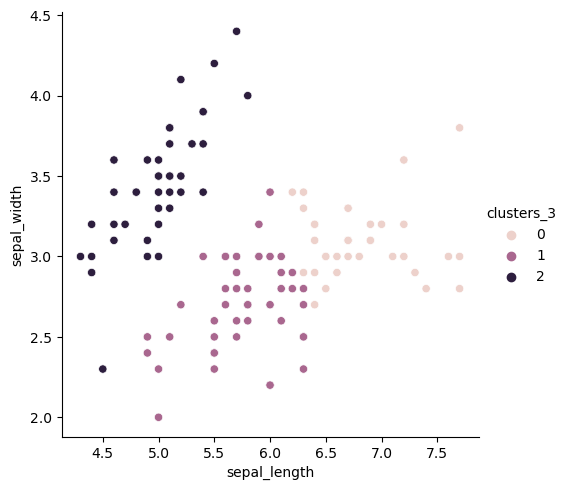

In [11]:
sns.relplot(data=X, x='sepal_length', y='sepal_width', hue='clusters_3')

In [12]:
def get_inertia(df):
    '''takes a dataframe, get inertia for n from 1 to 10 and return a dataframe with inertia'''
    
    # create an empty list to hold inertia
    inertia = []
    
    for n in range(1, 11):
        
        Kmeans = KMeans(n_clusters=n, random_state=seed)
        
        Kmeans.fit(df)
        
        inertia.append(Kmeans.inertia_)
        
    df_1= pd.DataFrame({'inertia': inertia, 'cluster': list(range(1,11))})
    
    return df_1

In [13]:
# get a dataframe with clusters and inertia
iris_inertia = get_inertia(X)

# look into data
iris_inertia.head()

,inertia,cluster
0,179.555250,1
1,73.912049,2
2,29.739179,3
3,23.858058,4
4,18.899311,5


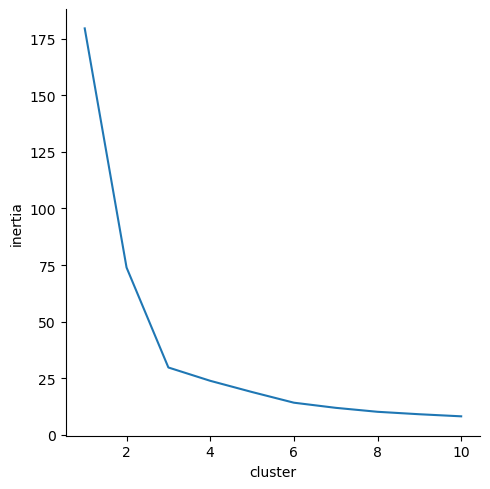

In [14]:
# plot a graph of cluster vs inertia
sns.relplot(data=iris_inertia, x='cluster', y='inertia', kind='line')

In [15]:
# create labels with attributes
X_1 = train[['petal_length', 'petal_width']]
X_2 = train[['petal_width', 'sepal_width']]
X_3 = train[['petal_width', 'sepal_length']]

In [16]:
# create new columns with clusters
X_1['clusters_3'] = make_cluster(X_1, n=3, seed = 42)
X_2['clusters_3'] = make_cluster(X_1, n=3, seed = 42)
X_3['clusters_3'] = make_cluster(X_1, n=3, seed = 42)

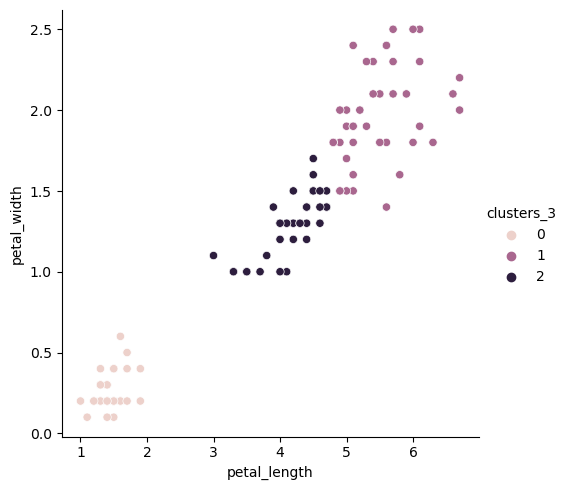

In [17]:

sns.relplot(data=X_1, x='petal_length', y='petal_width', hue='clusters_3')

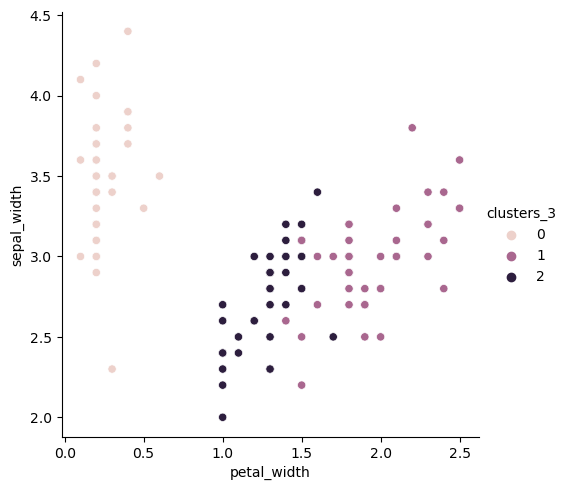

In [18]:
sns.relplot(data=X_2, x='petal_width', y='sepal_width', hue='clusters_3')

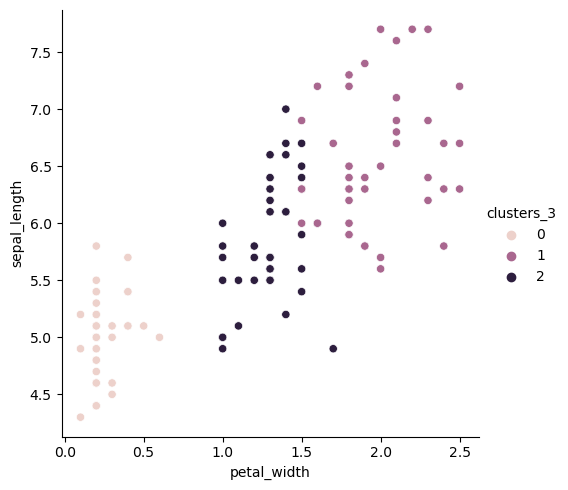

In [19]:
sns.relplot(data=X_3, x='petal_width', y='sepal_length', hue='clusters_3')

#### 2. Use the techniques discussed in this lesson, as well as the insights gained from the exploration exercise to perform clustering on the mall customers dataset. Be sure to visualize your results!

In [20]:
# acquire data using function from wrangle_mall module
customers = wm.get_mall_customers()

# peak into data
customers.head()

,customer_id,gender,age,annual_income,spending_score
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [21]:
# split data into train, validate and test data using function from wrangle_mall module
train, validate, test = wm.train_val_test(customers)

# get shape of train data
train.shape

(112, 5)

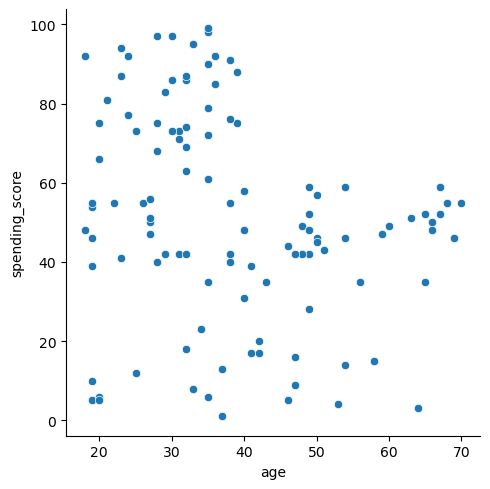

In [22]:
sns.relplot(data=train, x='age', y='spending_score')

In [23]:
# create labels with attributes
customers_X = train[['age', 'spending_score']]

In [24]:
# create a dataframe with clusters and inertia
customers_inertia= get_inertia(customers_X)

In [25]:
# peak into data
customers_inertia

,inertia,cluster
0,100259.741071,1
1,45392.350522,2
2,25571.675454,3
3,15885.836108,4
4,12986.090156,5
5,10151.923792,6
6,7848.116758,7
7,6819.060571,8
8,6040.383714,9
9,5382.671911,10


In [26]:
sns.relplot(data=customers_cluster, x='cluster', y='inertia', kind='line')

NameError: name 'customers_cluster' is not defined

In [ ]:
# create new columns with clusters
customers_X['cluster']= make_cluster(customers_X, n=4, seed = 42)

In [ ]:
# peak into data
customers_X.head()

In [ ]:
sns.relplot(data=customers_X, x='age', y='spending_score', hue='cluster')

#### 3. How does scaling impact the results of clustering?

Compare k-means clustering results on scaled and unscaled data (you can choose any dataset for this exercise OR use the data/steps outlined in the bonus below). You can show how the resulting clusters differ either with descriptive statistics or visually

In [ ]:
# scale data using MinMaxScaler

mm_scaler = MinMaxScaler()

customers_X[['age', 'spending_score']] = mm_scaler.fit_transform(customers_X[['age', 'spending_score']])

customers_X.head()

In [ ]:
# create new columns with clusters
customers_X['scaled_cluster'] = make_cluster(customers_X, n=4, seed = 42)

In [ ]:
# peak into data
customers_X.head()

In [ ]:
sns.relplot(data=customers_X, x='age', y='spending_score', hue='scaled_cluster')